In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import numpy as np

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.<br />
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.<br />
Создайте датафреймы X и y из этих данных.<br />
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.<br />
Масштабируйте данные с помощью StandardScaler.<br />
Постройте модель TSNE на тренировочный данных с параметрами:<br />
n_components=2, learning_rate=250, random_state=42.<br />
Постройте диаграмму рассеяния на этих данных.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
trgt = boston.target

In [4]:
fn = boston.feature_names

In [5]:
fn

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = pd.DataFrame(boston.data, columns=fn)

In [7]:
y = pd.DataFrame(trgt, columns=['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = lr.predict(X_test)

y_pred.shape

(102, 1)

In [14]:
lr.coef_

array([[-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,
         2.78443820e+00, -1.72026334e+01,  4.43883520e+00,
        -6.29636221e-03, -1.44786537e+00,  2.62429736e-01,
        -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]])

In [15]:
plt.rcParams['figure.figsize'] = 6, 4

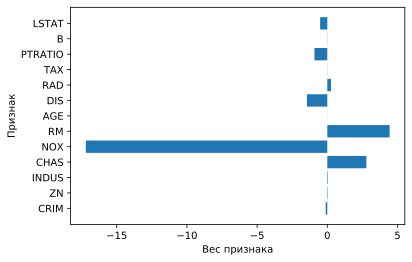

In [16]:
plt.barh(fn, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=fn)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=fn)

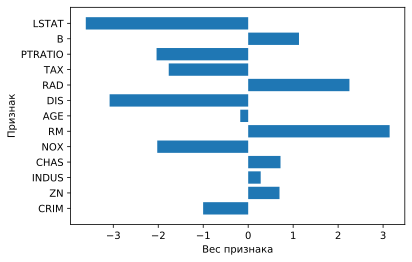

In [19]:
lr.fit(X_train_scaled, y_train)

plt.barh(fn, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [26]:
from sklearn.manifold import TSNE

In [27]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
tsne_results = tsne.fit_transform(X_train)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 2.0295639038085938 seconds


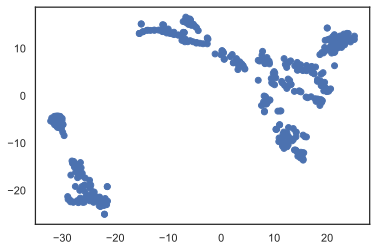

In [28]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

In [29]:
import seaborn as sns
sns.set(style="white")

In [30]:
# N = tsne_results.shape
N = 10000

In [31]:
df_s = pd.DataFrame(X_train)
df_s.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [32]:
tsne_results[:,0].shape

(404,)

In [33]:
df_s['tsne-2d-one'] = tsne_results[:,0]
df_s['tsne-2d-two'] = tsne_results[:,1]

In [34]:
# Example
# sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=mpg)

In [35]:
df_s.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,tsne-2d-one,tsne-2d-two
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,-26.225309,-16.375685
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.026859,9.140368
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,9.824575,4.759353
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,-31.103294,-4.273397
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,20.520693,10.289940


Постройте диаграмму рассеяния на этих данных.|

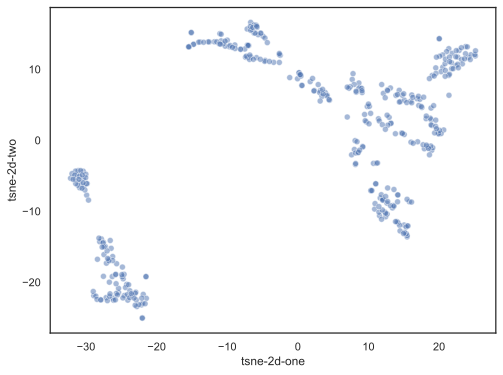

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
#     hue="",
    palette=sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True),
    data=df_s,
    legend="full",
    alpha=0.5
)
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.<br />
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.<br />
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.<br />
Вычислите средние значения price и CRIM в разных кластерах.

In [37]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [39]:
X_train_labels = model.fit_predict(X_train)

In [41]:
pd.value_counts(X_train_labels)

0    297
1     76
2     31
dtype: int64

In [266]:
# model.cluster_centers_
centers = model.cluster_centers_
centers

array([[ 4.04862828e-01,  1.57373737e+01,  8.34653199e+00,
         6.73400673e-02,  5.13783165e-01,  6.41719529e+00,
         6.11915825e+01,  4.44303199e+00,  4.47474747e+00,
         3.11919192e+02,  1.76760943e+01,  3.82707172e+02,
         1.03197643e+01,  8.97334179e+00,  4.95934046e+00],
       [ 1.17456618e+01, -3.55271368e-15,  1.84805263e+01,
         1.05263158e-01,  6.75750000e-01,  5.99338158e+00,
         8.90907895e+01,  2.06063684e+00,  2.32105263e+01,
         6.67776316e+02,  2.01960526e+01,  3.73692895e+02,
         1.79701316e+01, -2.53550269e+01, -1.99241297e+01],
       [ 1.43603803e+01, -3.55271368e-15,  1.78877419e+01,
         3.22580645e-02,  6.73193548e-01,  6.13600000e+00,
         8.87741935e+01,  2.01038387e+00,  2.21612903e+01,
         6.39935484e+02,  1.98677419e+01,  6.03793548e+01,
         1.94216129e+01, -2.93017296e+01, -3.83582457e+00]])

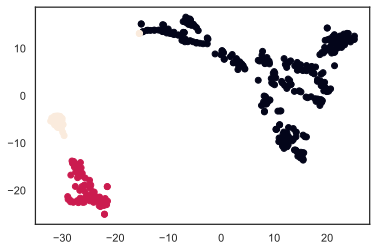

In [42]:
## запутался и не успел


plt.scatter(tsne_results[:,0], tsne_results[:,1], c=X_train_labels)
# plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

# plt.xlabel('tsne-2d-one')
# plt.ylabel('tsne-2d-two')

# plt.title('TSNE clustered')

In [43]:
for i in range(3):
    mean_price = y_train[X_train_labels==i].mean()[0]
    mean_crim = X_train.loc[X_train_labels==i, 'CRIM'].mean()
    print('Cluster {}: mean_pric = {}, mean_crim = {}'.format(i, '%0.2f' % mean_price, '%0.2f' % mean_crim))

Cluster 0: mean_pric = 25.17, mean_crim = 0.40
Cluster 1: mean_pric = 17.44, mean_crim = 11.75
Cluster 2: mean_pric = 13.20, mean_crim = 14.36


#### Задание 3*

In [53]:
X_test_labels = model.predict(X_test_scaled)

In [54]:
for i in range(3):
    mean_price = y_test[X_test_labels==i].mean()[0]
    mean_crim = X_test.loc[X_test_labels==i, 'CRIM'].mean()
    print('Cluster {}: mean_pric = {}, mean_crim = {}'.format(i, '%0.2f' % mean_price, '%0.2f' % mean_crim))

Cluster 0: mean_pric = 34.55, mean_crim = 0.08
Cluster 1: mean_pric = 16.71, mean_crim = 9.42
Cluster 2: mean_pric = 21.72, mean_crim = 0.22
